## **Programming Q1: Clustering.**

### **Q1a: KMeans on dataset 1**

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from collections import OrderedDict
import random
import queue as q
import warnings
warnings.filterwarnings('ignore')

np.random.seed(999)
random.seed(999)

In [2]:
x1, x2 = [], []
with open('dataset1.txt', 'r') as file:
    for line in file:
        temp = [float(x) for x in line.split()]
        x1.append(temp[0])
        x2.append(temp[1])

data = pd.DataFrame({'x1': x1, 'x2':x2})

In [3]:
data.head()

,x1,x2
0,1.489034,-0.372265
1,-0.993560,0.113308
2,1.375386,-0.426868
3,-0.856408,0.516299
4,0.446398,-0.332782


In [4]:
# data = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)

In [5]:
# data.head()

<AxesSubplot:xlabel='x1', ylabel='x2'>

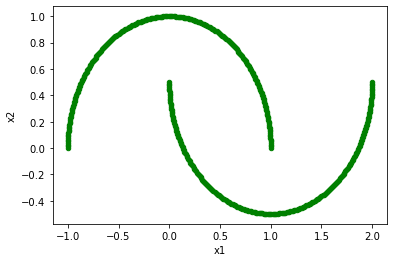

In [6]:
data.plot.scatter(x='x1', y='x2', c='green')

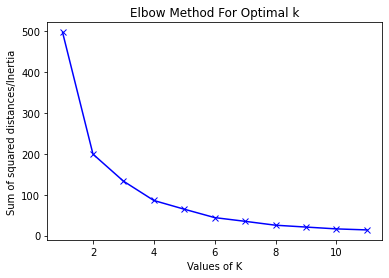

In [7]:
Sum_of_squared_distances = []
K = range(1,12)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

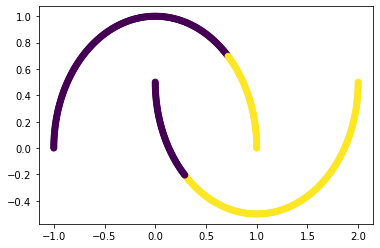

In [8]:
kmeans = KMeans(n_clusters=2, random_state=999)
label = kmeans.fit_predict(data)
plt.scatter(data.x1, data.x2, c=label)

### **Q1b: Implementation of DBSCAN and training on dataset 1**

In [9]:
class dbscan():
    def __init__(self, eps=0.5, min_pts=5):
        super (dbscan, self).__init__()
        self.eps = eps
        self.min_pts = min_pts
        
        
    def get_neighbors(self, data):
        dist = euclidean_distances(data, data)
        eps_neighbourhood_pts = np.array([np.where(row<=self.eps)[0] for row in dist])
    #         print(eps_neighbourhood_pts.shape[0])
        return eps_neighbourhood_pts

                
    def get_point_type(self, data, eps_neighbourhood_pts):
        core_pts = [idx for idx in range(eps_neighbourhood_pts.shape[0]) if eps_neighbourhood_pts[idx].shape[0]>=self.min_pts]
        maybe_border_pts = [idx for idx in range(eps_neighbourhood_pts.shape[0]) if idx not in core_pts]
        border_pts, noise_pts = [], []
        
        for idx in maybe_border_pts:
            for id in eps_neighbourhood_pts[idx]:
                if id in core_pts:
                    border_pts.append(idx)
                    break
        
        noise_pts = [x for x in maybe_border_pts if x not in border_pts]
        print('len(core_pts): {}, len(maybe_border_pts): {}, len(border_pts): {}, len(noise_pts): {}'.format(len(core_pts), len(maybe_border_pts), len(border_pts), len(noise_pts)))
                  
        return core_pts, border_pts, noise_pts
    
    
    def fit(self, data):
        eps_neighbourhood_pts = self.get_neighbors(data)
        core_pts, border_pts, noise_pts = self.get_point_type(data, eps_neighbourhood_pts)
        # Need not to create arbit_pts but using it for the sake of completeness as per the algorithm.
        arbit_pts = random.sample(range(eps_neighbourhood_pts.shape[0]), eps_neighbourhood_pts.shape[0])
        
        clusters, count, visited_pts = {}, 0, []
        for point in arbit_pts:
            neighs_neigh = q.Queue()
            if point in core_pts and point not in visited_pts:
                clusters[point] = count
                visited_pts.append(point)
                neighbors = eps_neighbourhood_pts[point]
                for neighbor in neighbors:
                    if neighbor in core_pts:
                        neighs_neigh.put(neighbor)
                        clusters[neighbor] = count
                        visited_pts.append(neighbor)
                    elif neighbor in border_pts:
                        clusters[neighbor] = count

                while not neighs_neigh.empty():
                    qneighbors = eps_neighbourhood_pts[neighs_neigh.get()]
                    for qneighbor in qneighbors:
                        if qneighbor in core_pts and qneighbor not in visited_pts:
                            neighs_neigh.put(qneighbor)
                            clusters[qneighbor] = count
                            visited_pts.append(qneighbor)

                        elif qneighbor in border_pts:
                            clusters[qneighbor] = count
                            visited_pts.append(qneighbor)

                count+=1
        clusters.update(dict.fromkeys(noise_pts, -1))
                
        return sorted(clusters.items())

len(core_pts): 500, len(maybe_border_pts): 0, len(border_pts): 0, len(noise_pts): 0


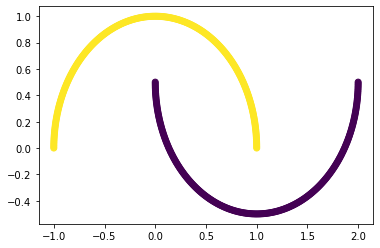

In [10]:
db = dbscan()
clusters = db.fit(data)
labels = [x[1] for x in clusters]
plt.scatter(data.x1, data.x2, c=labels)

#### **Comparing implemented DBSCAN with Sklearn DBSCAN (same performance)**

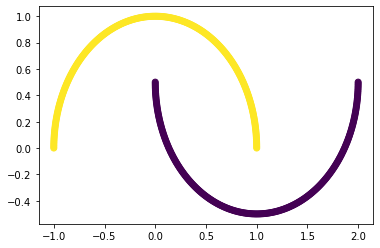

In [11]:
dbc = DBSCAN()
clusters = dbc.fit(data)
plt.scatter(data.x1, data.x2, c=clusters.labels_)

### **Q1c: Differences in implemented DBSCAN and KMeans**

### **Q1d: Comparison of implemented DBSCAN (sklearn and implemented respectively) against KMeans on dataset 2**

In [12]:
x1, x2, labels = [], [], []
with open('dataset2.txt', 'r') as file:
    for line in file:
        temp = [float(x) for x in line.split()]
        x1.append(temp[0])
        x2.append(temp[1])

data2 = pd.DataFrame({'x1': x1, 'x2':x2})

len(core_pts): 420, len(maybe_border_pts): 80, len(border_pts): 34, len(noise_pts): 46


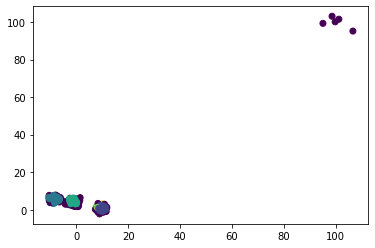

In [13]:
db = dbscan()
clusters = db.fit(data2)
labels = [x[1] for x in clusters]
rows = [x[0] for x in clusters]
plt.scatter(data2.iloc[rows, 0], data2.iloc[rows, 1], c=labels)

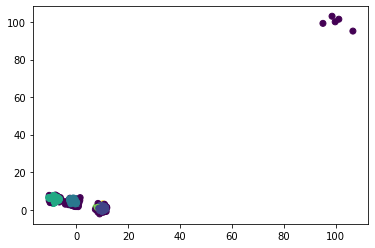

In [14]:
dbc = DBSCAN()
clusters = dbc.fit(data2)
plt.scatter(data2.x1, data2.x2, c=clusters.labels_)

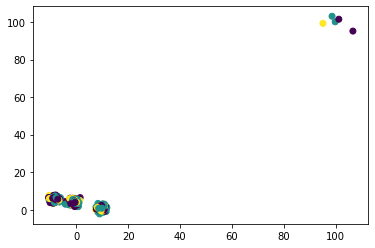

In [15]:
kmeans = KMeans(n_clusters=3, random_state=999)
label = kmeans.fit_predict(data)
plt.scatter(data2.x1, data2.x2, c=label)